In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ray_df = pd.read_csv('Ray_Fisher.csv')

In [3]:
ray_df.head()

,tweet_id,created_at,tweets,likes
0,1377795078538866692,2021-04-02 01:28:39,RT @ninaturner: Millions of Americans are stru...,0
1,1376896607917051906,2021-03-30 13:58:27,RT @CoriBush: They’re starting to count the un...,0
2,1376583218674106371,2021-03-29 17:13:09,"Toby Emmerich, Geoff Johns, and Jon Berg’s rac...",10699
3,1376569420877815815,2021-03-29 16:18:20,RT @CoriBush: Derek Chauvin is on trial.\nAmer...,0
4,1375943286846787585,2021-03-27 22:50:18,RT @BernieSanders: What Amazon workers in Alab...,0


In [4]:
ray_df['created_at'] = pd.to_datetime(ray_df['created_at'], errors='coerce')

In [5]:
ray_df['date'] = ray_df['created_at'].dt.date
ray_df['time'] = ray_df['created_at'].dt.time

In [6]:
ray_df.head()

,tweet_id,created_at,tweets,likes,date,time
0,1377795078538866692,2021-04-02 01:28:39,RT @ninaturner: Millions of Americans are stru...,0,2021-04-02,01:28:39
1,1376896607917051906,2021-03-30 13:58:27,RT @CoriBush: They’re starting to count the un...,0,2021-03-30,13:58:27
2,1376583218674106371,2021-03-29 17:13:09,"Toby Emmerich, Geoff Johns, and Jon Berg’s rac...",10699,2021-03-29,17:13:09
3,1376569420877815815,2021-03-29 16:18:20,RT @CoriBush: Derek Chauvin is on trial.\nAmer...,0,2021-03-29,16:18:20
4,1375943286846787585,2021-03-27 22:50:18,RT @BernieSanders: What Amazon workers in Alab...,0,2021-03-27,22:50:18


In [7]:
#function to remove and get hastags
def getHashtags(tweet):
    tweet = tweet.lower()  #has to be in place
    tweet = re.findall(r'\#\w+',tweet) # Remove hastags with REGEX
    return " ".join(tweet)

In [8]:
ray_df['Hashtags'] = ray_df['tweets'].apply(getHashtags)
ray_df.tail()

,tweet_id,created_at,tweets,likes,date,time,Hashtags
495,1311129240604160002,2020-09-30 02:22:25,"RT @NazaninNour: “Proud Boys, stand back and S...",0,2020-09-30,02:22:25,#debates2020
496,1311128652587950081,2020-09-30 02:20:05,“Putin’s Puppy”: The official mascot of #Debat...,580,2020-09-30,02:20:05,#debates2020 #joebiden
497,1311117368257654784,2020-09-30 01:35:14,Don’t ever use the word smart with me?!?!?\n\n...,1443,2020-09-30,01:35:14,#2020debate
498,1311116356486672390,2020-09-30 01:31:13,"“Will you shut up, man...?”\n\n ...",2850,2020-09-30,01:31:13,
499,1311100948295692289,2020-09-30 00:29:59,First Game Of The 2020 Finals Is Tonight.\n\n9...,214,2020-09-30,00:29:59,


In [9]:
#saving to csv
ray_df.to_csv('Trial.csv',index=False)

In [10]:
hashtags_list = ray_df['Hashtags'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Hashtags is: {hashtags_df.shape[0]}.')

Total Number of Unique Hashtags is: 93.


In [11]:
hashtags_df["Percentage"] = 100*(hashtags_df["Count"]/hashtags_df['Count'].sum())
hashtags_df = hashtags_df.head(10)

In [12]:
hashtags_df

,Hashtags,Count,Percentage
1,#snydercut,88,28.025478
3,#zacksnydersjusticeleague,39,12.420382
5,#borglife,22,7.006369
9,#cyborg,14,4.458599
60,#vote,10,3.184713
23,#usunited,8,2.547771
39,#unite,6,1.910828
20,#afsp,6,1.910828
61,#ghostoftsushima,6,1.910828
69,#debates2020,5,1.592357


In [13]:
likes_df = ray_df

In [14]:
likes_df

,tweet_id,created_at,tweets,likes,date,time,Hashtags
0,1377795078538866692,2021-04-02 01:28:39,RT @ninaturner: Millions of Americans are stru...,0,2021-04-02,01:28:39,
1,1376896607917051906,2021-03-30 13:58:27,RT @CoriBush: They’re starting to count the un...,0,2021-03-30,13:58:27,
2,1376583218674106371,2021-03-29 17:13:09,"Toby Emmerich, Geoff Johns, and Jon Berg’s rac...",10699,2021-03-29,17:13:09,
3,1376569420877815815,2021-03-29 16:18:20,RT @CoriBush: Derek Chauvin is on trial.\nAmer...,0,2021-03-29,16:18:20,
4,1375943286846787585,2021-03-27 22:50:18,RT @BernieSanders: What Amazon workers in Alab...,0,2021-03-27,22:50:18,
...,...,...,...,...,...,...,...
495,1311129240604160002,2020-09-30 02:22:25,"RT @NazaninNour: “Proud Boys, stand back and S...",0,2020-09-30,02:22:25,#debates2020
496,1311128652587950081,2020-09-30 02:20:05,“Putin’s Puppy”: The official mascot of #Debat...,580,2020-09-30,02:20:05,#debates2020 #joebiden
497,1311117368257654784,2020-09-30 01:35:14,Don’t ever use the word smart with me?!?!?\n\n...,1443,2020-09-30,01:35:14,#2020debate
498,1311116356486672390,2020-09-30 01:31:13,"“Will you shut up, man...?”\n\n ...",2850,2020-09-30,01:31:13,


In [18]:
likes_df = likes_df.sort_values('likes', ascending=False)

In [22]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #remove @mentions
    text = re.sub(r'RT[\s]+', '', text) #removing RT
    text = re.sub(r'https?:\/\/\S+', '', text)#remove the hyper link
    return text

In [23]:
likes_df['tweets'] = likes_df['tweets'].apply(cleanTxt)

In [26]:
likes_df = likes_df.head()

In [49]:
hbo_df = pd.read_csv('HBOmax.csv')

In [51]:
hbo_df.tail()

,tweet_id,created_at,tweets,likes
3245,1316905442816253952,2020-10-16 00:54:59,@perforada My thoughts exactly.,0
3246,1316905393654726657,2020-10-16 00:54:47,"@jaileysmariano Well ready or not, it's coming!",0
3247,1316905307117920263,2020-10-16 00:54:26,@SerialCine Save the date!!!,1
3248,1316905222002921472,2020-10-16 00:54:06,@lucid_unicorn Yes! Perfect time to catch up.,0
3249,1316905163483906048,2020-10-16 00:53:52,@AntonioFerdi88 The production values are seri...,2


In [52]:
hbo_df['created_at'] = pd.to_datetime(hbo_df['created_at'], errors='coerce')

In [53]:
hbo_df['date'] = hbo_df['created_at'].dt.date
hbo_df['time'] = hbo_df['created_at'].dt.time

In [54]:
hbo_df.head()

,tweet_id,created_at,tweets,likes,date,time
0,1379554521823711232,2021-04-06 22:00:03,"It’s A Sin, We Are Who We Are, Euphoria, and G...",174,2021-04-06,22:00:03
1,1379554520330539008,2021-04-06 22:00:03,If you could be friends with somebody from the...,519,2021-04-06,22:00:03
2,1379214807832870918,2021-04-05 23:30:09,The Fresh Prince of Bel-Air is now streaming o...,239,2021-04-05,23:30:09
3,1379214804951433224,2021-04-05 23:30:08,First person to tell me how many times Jazz wa...,415,2021-04-05,23:30:08
4,1379166582560104448,2021-04-05 20:18:31,"@WonderWomanFilm Jumping, climbing, pole vault...",107,2021-04-05,20:18:31


In [55]:
#function to remove and get hastags
def getHashtags(tweet):
    tweet = tweet.lower()  #has to be in place
    tweet = re.findall(r'\#\w+',tweet) # Remove hastags with REGEX
    return " ".join(tweet)

In [64]:
hbo_df['Hashtags'] = hbo_df['tweets'].apply(getHashtags)
hbo_df.tail(3000)

,tweet_id,created_at,tweets,likes,date,time,Hashtags
250,1368757257807175682,2021-03-08 02:55:35,"@DrHarleyQuinn2 Well, Pennywise can read minds 🤡",2,2021-03-08,02:55:35,
251,1368693228531187712,2021-03-07 22:41:09,"@genjisaurus Don't miss it, stream it!",15,2021-03-07,22:41:09,
252,1368692323152850946,2021-03-07 22:37:33,@HaggardReviews A great pick in my opinion 👏,1,2021-03-07,22:37:33,
253,1368692237433860097,2021-03-07 22:37:13,@Storyboii It's a lifestyle 😎,1,2021-03-07,22:37:13,
254,1368622506962157570,2021-03-07 18:00:08,Stream Teen Titans now on HBO Max.,450,2021-03-07,18:00:08,
...,...,...,...,...,...,...,...
3245,1316905442816253952,2020-10-16 00:54:59,@perforada My thoughts exactly.,0,2020-10-16,00:54:59,
3246,1316905393654726657,2020-10-16 00:54:47,"@jaileysmariano Well ready or not, it's coming!",0,2020-10-16,00:54:47,
3247,1316905307117920263,2020-10-16 00:54:26,@SerialCine Save the date!!!,1,2020-10-16,00:54:26,
3248,1316905222002921472,2020-10-16 00:54:06,@lucid_unicorn Yes! Perfect time to catch up.,0,2020-10-16,00:54:06,


In [68]:
hbo_df['date'] = pd.to_datetime(hbo_df['date'])
hbo_df[~(hbo_df['date'] < '2021-01-01')]

,tweet_id,created_at,tweets,likes,date,time,Hashtags
0,1379554521823711232,2021-04-06 22:00:03,"It’s A Sin, We Are Who We Are, Euphoria, and G...",174,2021-04-06,22:00:03,
1,1379554520330539008,2021-04-06 22:00:03,If you could be friends with somebody from the...,519,2021-04-06,22:00:03,
2,1379214807832870918,2021-04-05 23:30:09,The Fresh Prince of Bel-Air is now streaming o...,239,2021-04-05,23:30:09,
3,1379214804951433224,2021-04-05 23:30:08,First person to tell me how many times Jazz wa...,415,2021-04-05,23:30:08,
4,1379166582560104448,2021-04-05 20:18:31,"@WonderWomanFilm Jumping, climbing, pole vault...",107,2021-04-05,20:18:31,
...,...,...,...,...,...,...,...
1219,1345112561520320512,2021-01-01 21:00:00,Your one and only source into the scandalous l...,981,2021-01-01,21:00:00,
1220,1345097462629822465,2021-01-01 20:00:00,Starting the new year right by marathoning the...,1038,2021-01-01,20:00:00,
1221,1345069804500049921,2021-01-01 18:10:06,Doctor Who is streaming now on HBO Max.,493,2021-01-01,18:10:06,
1222,1344916273210146816,2021-01-01 08:00:01,"I know that from a non-linear, non-subjective ...",2743,2021-01-01,08:00:01,


In [69]:
hashtags_list = hbo_df['Hashtags'].tolist()

#iterate over all hashtags so they can be split where there is more than one hashtag per row
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Use the Built-in Python Collections module to determine Unique count of all hashtags used
from collections import Counter
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['Hashtags', 'Count']
hashtags_df.sort_values(by='Count', ascending=False, inplace=True)
print (f'Total Number of Unique Hashtags is: {hashtags_df.shape[0]}.')

Total Number of Unique Hashtags is: 132.


In [70]:
hashtags_df["Percentage"] = 100*(hashtags_df["Count"]/hashtags_df['Count'].sum())
hashtags_df = hashtags_df.head(10)

In [71]:
hashtags_df

,Hashtags,Count,Percentage
81,#ww84watchparty,26,9.122807
105,#freshprincereunion,24,8.421053
14,#snydercut,10,3.508772
18,#tomandjerrymovie,8,2.807018
83,#theflightattendant,7,2.456140
80,#ww84,7,2.456140
60,#wonderwoman1984,7,2.456140
1,#godzillavskong,7,2.456140
93,#theundoing,6,2.105263
32,#hbomax,6,2.105263


In [72]:
hbo_df = hbo_df.sort_values('likes', ascending=False)

In [73]:
hbo_df.groupby(['Hashtags'])['likes'].sum().reset_index()

Hashtags
                                        555344
#1                                           1
#12dateshbomax                             104
#13th                                        5
#20daysofkindness                         2628
                                         ...  
#wonderwoman1984                         12564
#wonderwoman1984 #hbomax #wbpictures     18540
#wonderwomanday                           2405
#ww84                                     5273
#ww84watchparty                          61879
Name: likes, Length: 122, dtype: int64

In [42]:
hbo_df = hbo_df.head()

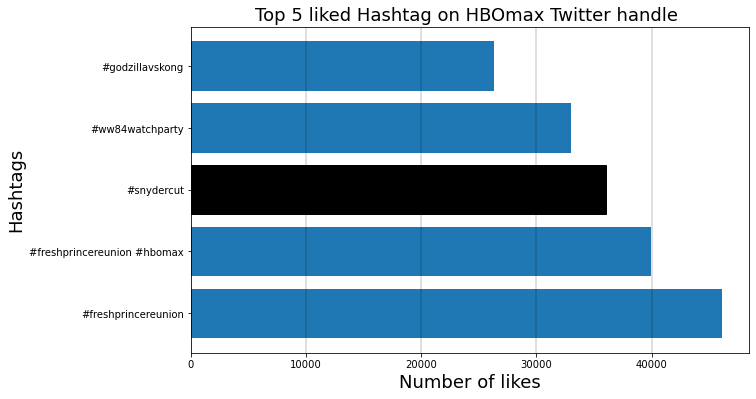

In [47]:
snydercut = plt.barh(hbo_df['Hashtags'],hbo_df['likes'])
snydercut[2].set_color('black')
plt.title("Top 5 liked on HBOmax Twitter handle ", fontsize=18)
plt.xlabel('Number of likes', fontsize=18)
plt.ylabel('Hashtags', fontsize=18)
plt.grid(color='black', axis='x', ls = '-', lw = 0.25)
plt.rcParams['figure.figsize'] = (10,6)
plt.savefig('HBOmax_Likes.png', bbox_inches = "tight")
plt.show()